**DESPRE:** În acest notebook este partea a doua de la cercetarea dacă durata unui audio are vreo influență. Folosind atât funcțiile MDFFA, cât și Surfboard. Am încercat să folosesc audio scurte pentru antrenament și audio lungi pentru testare => să văd ce se întâmplă.

# All vowels

## Imports

### Install and imports

In [ ]:
!pip install tabpfn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import time
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn
import pathlib
import csv
import os
import math
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit



from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics


from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay

### Creating the dataframes

## Train

In [ ]:
features_train = pd.read_csv(f'/content/drive/MyDrive/Parkinson CSV files/features_less_2seconds_mfdfa_and_surfboard.csv', index_col = 0)
features_train.head(5)


NameError: ignored

In [ ]:
labels_train = np.array(features_train['label'])

In [ ]:
features_train = features_train[['a_A','b_A','c_A','d_A','g_A','a_E','b_E','c_E','d_E','g_E','a_I','b_I','c_I','d_I','g_I','a_O','b_O','c_O','d_O','g_O','a_U','b_U','c_U','d_U','g_U',
                                     'mfcc_mean_1_A', 'mfcc_mean_2_A', 'mfcc_mean_4_A', 'mfcc_mean_9_A',
       'mfcc_mean_10_A', 'mfcc_mean_12_A', 'mfcc_mean_13_A',
       'loudness_slidingwindow_mean_A', 'hnr_A', 'LPC_2_A', 'LPC_3_A',
       'mfcc_mean_1_E', 'mfcc_mean_3_E', 'mfcc_mean_5_E', 'mfcc_mean_6_E',
       'mfcc_mean_7_E', 'mfcc_mean_10_E', 'mfcc_mean_11_E', 'mfcc_mean_12_E',
       'mfcc_mean_13_E', 'f0_contour_mean_E', 'f0_mean_E', 'hnr_E', 'LPC_2_E',
       'LPC_3_E', 'mfcc_mean_1_I', 'mfcc_mean_3_I', 'mfcc_mean_5_I',
       'mfcc_mean_6_I', 'mfcc_mean_7_I', 'mfcc_mean_9_I', 'mfcc_mean_11_I',
       'mfcc_mean_12_I', 'mfcc_mean_13_I', 'f0_contour_mean_I', 'hnr_I',
       'LPC_2_I', 'LPC_3_I', 'LPC_4_I', 'mfcc_mean_3_O', 'mfcc_mean_4_O',
       'mfcc_mean_6_O', 'mfcc_mean_8_O', 'mfcc_mean_9_O', 'mfcc_mean_13_O',
       'f0_contour_mean_O', 'f0_std_O', 'log_energy_O',
       'loudness_slidingwindow_mean_O', 'mfcc_mean_2_U', 'mfcc_mean_3_U',
       'mfcc_mean_5_U', 'mfcc_mean_6_U', 'mfcc_mean_7_U', 'mfcc_mean_8_U',
       'mfcc_mean_10_U', 'mfcc_mean_11_U', 'hnr_U']]

# Convert to numpy array
features_train = np.array(features_train)

## Test

In [ ]:
features_test = pd.read_csv(f'/content/drive/MyDrive/Parkinson CSV files/features_more_2seconds_mfdfa_and_surfboard.csv', index_col = 0)
features_test.head(5)


In [ ]:
labels_test = np.array(features_test['label'])

In [ ]:
features_test = features_test[['a_A','b_A','c_A','d_A','g_A','a_E','b_E','c_E','d_E','g_E','a_I','b_I','c_I','d_I','g_I','a_O','b_O','c_O','d_O','g_O','a_U','b_U','c_U','d_U','g_U',
                                     'mfcc_mean_1_A', 'mfcc_mean_2_A', 'mfcc_mean_4_A', 'mfcc_mean_9_A',
       'mfcc_mean_10_A', 'mfcc_mean_12_A', 'mfcc_mean_13_A',
       'loudness_slidingwindow_mean_A', 'hnr_A', 'LPC_2_A', 'LPC_3_A',
       'mfcc_mean_1_E', 'mfcc_mean_3_E', 'mfcc_mean_5_E', 'mfcc_mean_6_E',
       'mfcc_mean_7_E', 'mfcc_mean_10_E', 'mfcc_mean_11_E', 'mfcc_mean_12_E',
       'mfcc_mean_13_E', 'f0_contour_mean_E', 'f0_mean_E', 'hnr_E', 'LPC_2_E',
       'LPC_3_E', 'mfcc_mean_1_I', 'mfcc_mean_3_I', 'mfcc_mean_5_I',
       'mfcc_mean_6_I', 'mfcc_mean_7_I', 'mfcc_mean_9_I', 'mfcc_mean_11_I',
       'mfcc_mean_12_I', 'mfcc_mean_13_I', 'f0_contour_mean_I', 'hnr_I',
       'LPC_2_I', 'LPC_3_I', 'LPC_4_I', 'mfcc_mean_3_O', 'mfcc_mean_4_O',
       'mfcc_mean_6_O', 'mfcc_mean_8_O', 'mfcc_mean_9_O', 'mfcc_mean_13_O',
       'f0_contour_mean_O', 'f0_std_O', 'log_energy_O',
       'loudness_slidingwindow_mean_O', 'mfcc_mean_2_U', 'mfcc_mean_3_U',
       'mfcc_mean_5_U', 'mfcc_mean_6_U', 'mfcc_mean_7_U', 'mfcc_mean_8_U',
       'mfcc_mean_10_U', 'mfcc_mean_11_U', 'hnr_U']]

# Convert to numpy array
features_test = np.array(features_test)

## TabPFN

**In order to get the fastest predictions you need to enable GPUs for the notebook:**
* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down
(https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=oM_8ELnJq_wd)

In [ ]:
X_train = features_train
y_train = labels_train
X_test = features_test
y_test = labels_test

In [ ]:
# N_ensemble_configurations defines how many estimators are averaged, it is bounded by #features * #classes
# more ensemble members are slower, but more accurate
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [ ]:
start = time.time()
classifier.fit(X_train, y_train)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))

Prediction time:  0.5103154182434082 Accuracy 0.6086956521739131


In [ ]:
# print(file, type(file))
out_table = pd.DataFrame(X_test.copy().astype(str))
out_table['prediction'] = [f"{y_e} (p={p_e:.2f})" for y_e, p_e in zip(y_eval, p_eval)]
out_table

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,prediction
0,-0.0238486321365433,1.4254890800702087,40.73414359955652,0.5014338228891176,1.0563394486235165,0.0022808094627887,2.183829607158228,37.55432589245017,0.6046065114841584,0.7545688881613525,...,197.65031,68.04728,22.730877,1.68572,-12.850858,-25.414022,14.432078,-5.155231,16.921560641452782,1 (p=0.87)
1,-0.0052588526981833,1.808646560829982,44.46806305491359,0.6778194164535868,1.073029812928206,0.0023802789797951,2.21252239656022,40.70503972277128,0.588844166304823,0.7603422249057855,...,210.28244,62.47197,25.717434,-0.11636922,-9.6103115,-31.44106,16.505722,-13.440844,9.182764743242757,1 (p=0.83)
2,0.0031105822715246,1.7868413269673753,43.23617632488653,0.1864166697030183,0.7296457982335567,0.0055870551680725,2.2086792079606807,41.474667232599856,0.7655385398671626,0.7923544084895254,...,206.0899,70.93346,34.560955,2.5768442,-18.915766,-24.060505,5.0183716,-12.366157,21.656542707682988,1 (p=0.87)
3,-0.0100226157182987,1.2398553732269804,239.1960924906572,0.25627313895682,5.827016762003794,0.0037963891436275,2.495989271952585,29.390678868156854,0.2688069962440275,0.7323994054425055,...,165.05707,63.13548,11.296269,-17.710089,-25.24421,-9.794264,-3.1461766,-0.49241006,27.943302514775528,0 (p=0.94)
4,-0.0030339605358863,1.6787383990072515,21.48983439187723,0.162299323466994,0.6103057974817241,0.0122624165498913,2.7774661596027364,39.18101219702758,0.2845541430192575,0.9590776420648384,...,134.42178,55.003105,8.574642,-14.325114,-29.192558,-9.209728,-9.506104,-6.2416897,30.47583420521785,0 (p=0.99)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.0011166257266209,1.814386435231016,82.09743374679988,0.2905222362753256,1.846708897719496,-0.0109515107335752,1.2588818259952688,158.40699220162452,0.2787755120831422,3.1083046226704734,...,172.5491,27.718554,4.128516,2.5903633,-17.959888,-12.8586855,-30.242264,-16.452845,21.269800789405156,1 (p=0.91)
111,-0.0029182776900182,1.3111637899124913,48384.99862708844,0.2760008641473552,3880.280787451253,-0.0037171109020383,1.725846031413468,41.72048616340959,0.3149352974361368,0.988546825178337,...,165.45892,23.40767,6.546531,-0.40073064,-23.561184,-10.592421,-30.542982,-19.785353,23.3672211679808,1 (p=0.89)
112,0.0028029016579502,2.433086662739628,37.87305476506516,0.0896654921860025,0.4385585033339665,0.0016964830908982,2.468749088961022,47.364169114455855,0.0927837375101495,0.7323325995479325,...,138.0894,43.482773,19.198608,-6.339644,-25.324394,-8.972882,-5.006924,-2.3719783,24.66133988433528,0 (p=0.51)
113,0.0003623591024375,1.6353354253876269,426.6298879774566,0.1186579161569794,13.395817767513162,0.0004099466245648,1.95650451943331,96.4850042965493,0.1261032274494163,1.8457962012307816,...,135.70375,41.050583,18.42277,-7.425008,-30.389822,-15.904258,-7.9958553,-7.97734,23.17954273364443,0 (p=0.83)


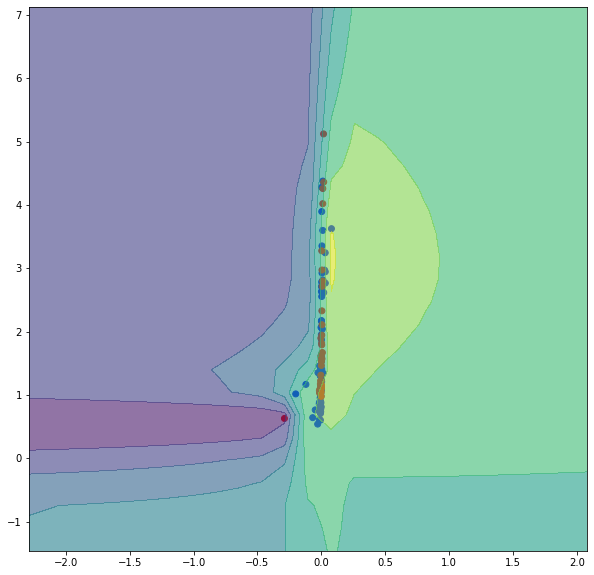

In [ ]:
# PLOTTING
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot the training points
vfunc = np.vectorize(lambda x : np.where(classifier.classes_ == x)[0])
y_train_index = vfunc(y_train)
y_train_index = y_train_index == 0

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_index, cmap=cm_bright)

classifier.fit(X_train[:, 0:2], y_train_index)

DecisionBoundaryDisplay.from_estimator(
    classifier, X_train[:, 0:2], alpha=0.6, ax=ax, eps=2.0, grid_resolution=25, response_method="predict_proba"
)

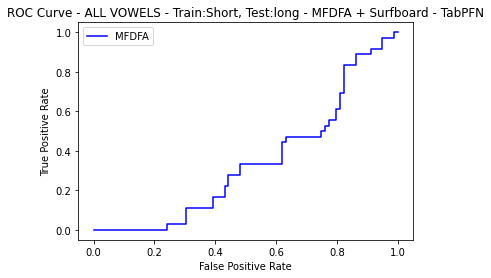

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_eval,  p_eval)
plt.plot(fpr, tpr, color='blue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(f'ROC Curve - ALL VOWELS - Train:Short, Test:long - MFDFA + Surfboard - TabPFN')
plt.legend()
plt.show()

# Each vowel

### Install and imports

In [ ]:
!pip install tabpfn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 KB 15.6 MB/s eta 0:00:00


In [ ]:
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import torch
import time
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn
import pathlib
import csv
import os
import math
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit



from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import metrics


from tabpfn.scripts.transformer_prediction_interface import TabPFNClassifier
from tabpfn.scripts.decision_boundary import DecisionBoundaryDisplay

### Data

In [ ]:
vowel = 'U'

In [ ]:
# Read in data and display first 5 rows
features = pd.read_csv(f'/content/drive/MyDrive/Parkinson CSV files/Does audio length influence anything?/vowel_{vowel}_features.csv', index_col = 0)
features.head(5)

,filename,duration,a,b,c,d,g,mfcc_mean_1_U,mfcc_mean_2_U,mfcc_mean_3_U,...,f2_U,f3_U,f4_U,hnr_U,LPC_0_U,LPC_1_U,LPC_2_U,LPC_3_U,LPC_4_U,label
0,AVPEPUDEAC0001u1.wav,0.945624,0.001032,2.169425,55.568393,0.330444,1.378344,-527.04210,138.99689,63.262894,...,855.923600,2691.467349,3799.771303,25.690630,1.0,-1.616006,0.545474,-0.210866,0.286774,0
1,AVPEPUDEAC0001u2.wav,0.713243,0.001873,2.248821,53.709778,0.321121,1.117390,-527.62590,145.30290,63.812680,...,773.168390,2650.082362,3589.815036,23.842138,1.0,-1.539481,0.423439,-0.195197,0.316220,0
2,AVPEPUDEAC0001u3.wav,1.610431,0.001918,1.870120,5254.418692,0.745454,3849.358639,-491.27383,152.82129,61.418854,...,2802.277666,3767.566577,5145.967325,31.139092,1.0,-2.011995,1.356277,-0.654453,0.314099,0
3,AVPEPUDEAC0003u1.wav,3.942313,0.001005,2.140444,63.683365,0.436536,1.086134,-482.94720,197.65031,68.047280,...,2192.993042,3346.745084,5069.993537,16.921561,1.0,-1.642249,0.356673,0.245914,0.042785,0
4,AVPEPUDEAC0003u2.wav,5.340816,0.004552,2.416168,52.686015,0.631657,0.853819,-451.25977,210.28244,62.471970,...,2181.058987,3110.540368,5115.181137,9.182765,1.0,-1.815578,0.586728,0.301841,-0.070649,0


In [ ]:
# < 2 SECONDS
features_less_conditioned = features
features_less_conditioned = features_less_conditioned[features_less_conditioned.duration < 2]
features_less_conditioned.groupby('label').count()

labels_less_conditioned = np.array(features_less_conditioned['label'])
# Remove the labels from the features
features_less_conditioned = features_less_conditioned.drop(['filename','duration', 'label'], axis = 1)

# Saving feature names for later use
feature_list_less_conditioned = list(features_less_conditioned.columns)

# Convert to numpy array
features_less_conditioned = np.array(features_less_conditioned)

In [ ]:
# >=2 SECONDS <=3
features_more_conditioned = features
features_more_conditioned = features_more_conditioned[(features_more_conditioned.duration >= 2) & (features_more_conditioned.duration <= 4) ]     #HERE!!!!!!!!!!!!!!!!!!
features_more_conditioned.groupby('label').count()

labels_more_conditioned = np.array(features_more_conditioned['label'])
# Remove the labels from the features
features_more_conditioned = features_more_conditioned.drop(['filename','duration', 'label'], axis = 1)

# Saving feature names for later use
feature_list_more_conditioned = list(features_more_conditioned.columns)

# Convert to numpy array
features_more_conditioned = np.array(features_more_conditioned)

In [ ]:
features_less_conditioned.shape

(171, 47)

In [ ]:
features_more_conditioned.shape

(85, 47)

### Train - short test - long

In [ ]:
X_train = features_less_conditioned
y_train = labels_less_conditioned
X_test = features_more_conditioned
y_test = labels_more_conditioned

In [ ]:
# N_ensemble_configurations defines how many estimators are averaged, it is bounded by #features * #classes
# more ensemble members are slower, but more accurate
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [ ]:
start = time.time()
classifier.fit(X_train, y_train)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))

Prediction time:  0.27657032012939453 Accuracy 0.6705882352941176


In [ ]:
# print(file, type(file))
out_table = pd.DataFrame(X_test.copy().astype(str))
out_table['prediction'] = [f"{y_e} (p={p_e:.2f})" for y_e, p_e in zip(y_eval, p_eval)]
out_table

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,prediction
0,0.0010051799959799,2.140444260052537,63.68336502973232,0.4365364580020477,1.0861337257126396,-482.9472,197.65031,68.04728,44.508736,22.730877,...,2192.993042092805,3346.745083923376,5069.993536838171,16.921560641452782,1.0,-1.6422491,0.35667345,0.24591397,0.042785235,1 (p=0.75)
1,0.0058734418192381,2.4402176737700496,56.308157985783886,0.7150654331555927,0.9969593176379392,-466.0725,206.0899,70.93346,44.3638,34.560955,...,2240.4127388804613,3078.829834717328,4501.265605028126,21.656542707682988,1.0,-1.733851,0.44402558,0.33414435,-0.041873768,1 (p=0.64)
2,-0.0010004868408912,1.964900787365824,73.25488331894537,0.3452765567870385,1.803727847728988,-529.41486,165.05707,63.13548,34.321434,11.296268,...,787.900516138814,2478.228549412943,3892.135698984217,27.943302514775528,1.0,-1.4299622,0.053257026,0.20682526,0.175027,0 (p=0.72)
3,0.0042579669595961,2.652054915942033,42.66083919778853,0.3019511613976358,1.1084897119705233,-518.1347,134.42178,55.00311,55.96374,8.574642,...,2771.692443225589,3576.607522109842,4433.862076478606,30.47583420521785,1.0,-1.6484717,0.6841056,-0.38886285,0.35867035,0 (p=0.94)
4,0.0036455568709393,2.519213245486545,44.56545073707341,0.3558120001300713,1.093006061811122,-510.16098,139.74234,53.5437,55.80337,9.229911,...,797.9885089796624,2877.95144315594,3865.944911662844,32.85586677630033,1.0,-1.6828895,0.65538335,-0.23105939,0.2633485,0 (p=1.00)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0.0006050864911651,2.0199503461623385,75.5104915207529,0.5965107246525146,1.2177661928156882,-444.74442,176.80382,51.5621,56.740726,25.425581,...,2281.506831666281,3190.916818649044,3845.741561501657,18.993755233044062,1.0,-1.949557,1.2508757,-0.591171,0.2929791,1 (p=0.92)
81,0.0005557416434501,2.2743487805845684,45.71774609134516,0.0876159973694516,0.9272094017516408,-613.4934,139.2244,54.806904,42.365234,5.0516143,...,2665.867023289494,3483.942036452731,4372.243193538197,22.01968560060771,1.0,-1.5402746,0.32115006,0.032116175,0.1927062,1 (p=0.84)
82,0.0017810000847857,2.994399338474332,28.424451761335156,0.1011723429315959,0.5312165838822075,-597.0018,150.35551,50.230316,33.058628,7.8106093,...,2619.7145125440798,3393.094574676423,4297.321869812095,25.026582509699125,1.0,-1.4449991,0.1943072,-0.019976288,0.27802348,0 (p=0.57)
83,0.0095497880585586,2.6590030167192475,42.74075428573993,0.5838464391498801,1.4363698146729242,-381.8553,164.59648,25.796793,-5.490406,5.922304,...,2402.270727142543,3113.141609501713,3642.0225650141206,24.069607268674417,1.0,-1.5168973,0.18198267,0.2542684,0.0869022,1 (p=0.63)


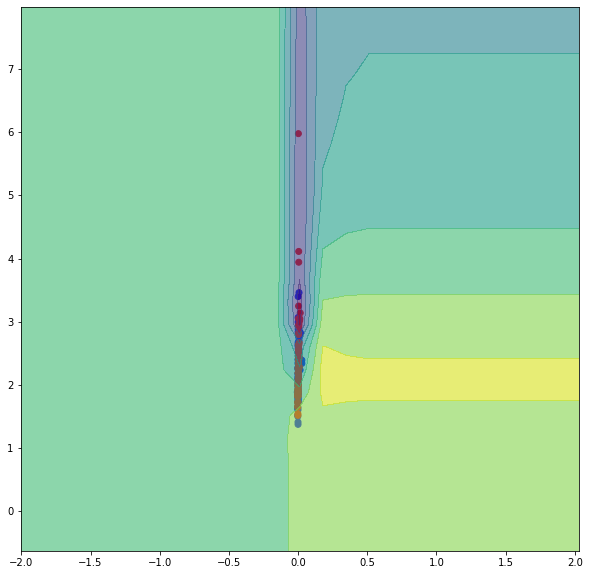

In [ ]:
# PLOTTING
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot the training points
vfunc = np.vectorize(lambda x : np.where(classifier.classes_ == x)[0])
y_train_index = vfunc(y_train)
y_train_index = y_train_index == 0

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_index, cmap=cm_bright)

classifier.fit(X_train[:, 0:2], y_train_index)

DecisionBoundaryDisplay.from_estimator(
    classifier, X_train[:, 0:2], alpha=0.6, ax=ax, eps=2.0, grid_resolution=25, response_method="predict_proba"
)

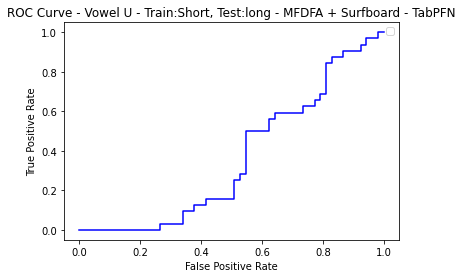

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_eval,  p_eval)
plt.plot(fpr, tpr, color='blue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(f'ROC Curve - Vowel {vowel} - Train:Short, Test:long - MFDFA + Surfboard - TabPFN')
plt.legend()
plt.show()

### Train - long test - short

In [ ]:
X_train =  features_more_conditioned
y_train =  labels_more_conditioned
X_test = features_less_conditioned
y_test = labels_less_conditioned

In [ ]:
# N_ensemble_configurations defines how many estimators are averaged, it is bounded by #features * #classes
# more ensemble members are slower, but more accurate
classifier = TabPFNClassifier(device='cuda', N_ensemble_configurations=4)

Loading model that can be used for inference only
Using a Transformer with 25.82 M parameters


In [ ]:
start = time.time()
classifier.fit(X_train, y_train)
y_eval, p_eval = classifier.predict(X_test, return_winning_probability=True)
print('Prediction time: ', time.time() - start, 'Accuracy', accuracy_score(y_test, y_eval))

Prediction time:  0.21458125114440918 Accuracy 0.6666666666666666


In [ ]:
# print(file, type(file))
out_table = pd.DataFrame(X_test.copy().astype(str))
out_table['prediction'] = [f"{y_e} (p={p_e:.2f})" for y_e, p_e in zip(y_eval, p_eval)]
out_table

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,prediction
0,0.0010323545314115,2.169424872494098,55.568392632602944,0.3304438738345613,1.378344439465265,-527.0421,138.99689,63.262894,45.264217,1.0161366,...,855.923599593989,2691.4673491232497,3799.771302651279,25.69062954071532,1.0,-1.6160061,0.5454736,-0.21086594,0.28677386,1 (p=0.92)
1,0.0018732228166954,2.248821420236031,53.70977824882354,0.3211210993724934,1.117389929293388,-527.6259,145.3029,63.81268,42.161705,4.0167556,...,773.1683902003693,2650.082361833735,3589.8150362841484,23.84213834844807,1.0,-1.5394807,0.42343917,-0.19519722,0.31621957,1 (p=0.98)
2,0.00191837338819,1.8701199143348484,5254.418691863551,0.7454542509905505,3849.3586393557935,-491.27383,152.82129,61.418854,45.529526,3.2919927,...,2802.277665561796,3767.566576692975,5145.967324929439,31.139092350242336,1.0,-2.0119948,1.3562769,-0.65445346,0.31409934,1 (p=0.74)
3,0.0001393810011537,2.105649976999638,60.0820075288377,0.3932516873204039,1.4482064383398343,-538.61176,152.3554,66.79336,42.24339,13.074561,...,2559.204962266286,3964.3720753053335,4380.492078709396,31.511205293190464,1.0,-1.430358,0.11745389,0.07741046,0.24077736,1 (p=0.74)
4,-0.0037482292975712,1.6428297268755838,199.9256732071999,0.3718982508327685,6.0770006393493885,-516.51263,160.3738,55.25749,40.95184,10.210754,...,2536.6910440727024,4009.458008385107,4505.874960555405,29.674415982889904,1.0,-1.6837969,0.44404963,0.19392015,0.05038294,1 (p=0.57)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.0112818661560907,3.017017097802336,54.66279407473308,0.7620717584919819,0.7169613304707482,-426.48904,128.55519,52.194008,65.07396,-12.352106,...,2495.142626584766,3709.613466784506,4471.442798632258,15.917511945189366,1.0,-2.1033947,1.8664856,-1.2422435,0.48101938,1 (p=0.98)
167,0.0009756864423035,2.184337228780396,56.20430157430027,0.2815567524213522,1.0710042747267443,-555.92096,165.79442,63.359375,66.27933,5.8266735,...,706.0143180028355,2579.914151083033,3510.3010874296583,22.9908168356536,1.0,-2.1148489,1.5490998,-0.7215648,0.2904456,1 (p=0.86)
168,-3.359024503294453e-05,2.0290403613767816,67.64256197918812,0.2037517059096617,1.28735748450755,-584.7003,163.52937,73.13248,56.585262,16.858936,...,2567.4967329460264,3507.267237555636,5010.840083749896,20.07105601574554,1.0,-1.8007572,0.95185673,-0.46720654,0.31994274,1 (p=0.89)
169,0.0003725059762106,2.084417550633124,63.1831351217925,0.2307027392274101,1.1512491890190322,-574.8152,181.23015,70.06293,53.521385,24.725311,...,2519.3221454286368,3435.0055855897804,4914.040199519905,19.4022174181332,1.0,-1.6617882,0.44293103,0.12350255,0.09902249,1 (p=0.72)


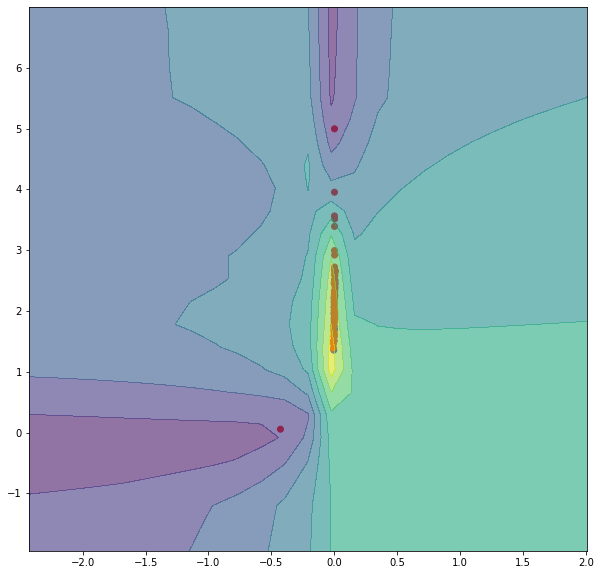

In [ ]:
# PLOTTING
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cm = plt.cm.RdBu
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

# Plot the training points
vfunc = np.vectorize(lambda x : np.where(classifier.classes_ == x)[0])
y_train_index = vfunc(y_train)
y_train_index = y_train_index == 0

ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train_index, cmap=cm_bright)

classifier.fit(X_train[:, 0:2], y_train_index)

DecisionBoundaryDisplay.from_estimator(
    classifier, X_train[:, 0:2], alpha=0.6, ax=ax, eps=2.0, grid_resolution=25, response_method="predict_proba"
)

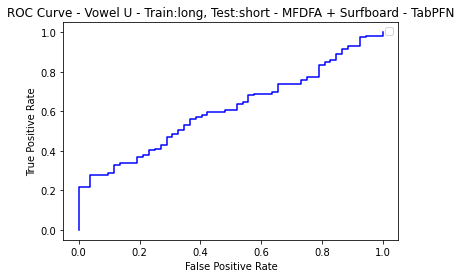

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_eval,  p_eval)
plt.plot(fpr, tpr, color='blue')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title(f'ROC Curve - Vowel {vowel} - Train:long, Test:short - MFDFA + Surfboard - TabPFN')
plt.legend()
plt.show()